Q1) Use the function 3𝑥^2 − 3𝑥 + 4 to get its minimum value using the
Gradient Descent Algorithm. Plot the necessary graphs and compare
the minimum value with the theoretical minimum.

In [107]:
#Q1)
import numpy as np

poly = np.poly1d([3, -3, 4])
lr = 0.01
epochs = 100
print("function is: ", poly)

def fwd(x):
  return poly(x)

def bwd(x):
  return x - lr*gradient(x)

def gradient(x):
  derivative = poly.deriv()
  return derivative(x)

ep = []
val = []
initial = np.random.randint(-10,10,1)[0]

for i in range(epochs):
  ep.append(i)
  val.append(fwd(initial))
  initial = bwd(initial)

print("\nTheoretical minima: 0.5")
print("\nAchieved minima:",initial)




function is:     2
3 x - 3 x + 4

Theoretical minima: 0.5

Achieved minima: 0.49486281307369095


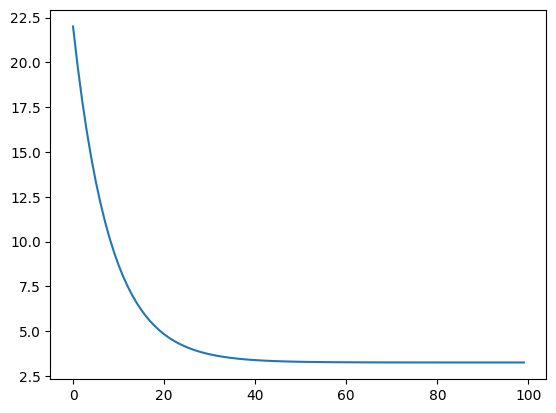

In [108]:
import matplotlib.pyplot as plt
plt.plot(ep,val)
plt.show()

Q2) Develop an ANN model of regression for predicting the values.

In [109]:
#Q2)
# x = randint
# y = equation
# pytorch tensor
# hidden layer 1
# linear activation
# meansquared error

In [110]:
import torch
import torch.nn as nn

In [111]:
#create data
x = torch.rand(1000,1)
y = 3*x**2 - 3*x + 4

In [112]:
#define parameters
epochs = 500
batchSize = 10
lr = 0.0001

In [113]:
#create model architecture
class ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.activation = nn.ReLU()
    self.l1 = nn.Linear(1,2)
    self.l2 = nn.Linear(2,1)

  def forward(self,x):
    out1 = self.l1(x)
    act = self.activation(out1)
    out2 = self.l2(act)
    return out2


In [114]:
#model object
model = ANN()
print(model)

ANN(
  (activation): ReLU()
  (l1): Linear(in_features=1, out_features=2, bias=True)
  (l2): Linear(in_features=2, out_features=1, bias=True)
)


In [115]:
#loss
criteria = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr,momentum = 0.9,dampening = 0.1)

In [116]:
lossHist =  []
epochHist = []

#Training loop
length = len(x)
for e in range(epochs):
  for i in range(0,length,batchSize):
    xBatch = x[i:i+batchSize]
    yBatch = y[i:i+batchSize]

    output = model(xBatch)
    loss = criteria(output,yBatch)

    #backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  lossHist.append(loss.item())
  epochHist.append(e)
  if e%100 == 0:
    print(f"Epoch: {e} Loss: {loss.item():.4f}")



Epoch: 0 Loss: 9.1581
Epoch: 100 Loss: 0.0144
Epoch: 200 Loss: 0.0108
Epoch: 300 Loss: 0.0083
Epoch: 400 Loss: 0.0063


In [117]:
#plotting convergence
import plotly.express as px
fig = px.line(x=epochHist,y=lossHist,labels={"x":"Epoch","y":"Loss"})
fig.show()

In [118]:
#testing

with torch.no_grad():
  a = 1
  test = torch.tensor([a],dtype=torch.float32)
  #test = test.reshape(-1,1)
  print(f"Expected output: 4 \nModel output: {model(test).item()}")

Expected output: 4 
Model output: 3.7120656967163086
